# Introduction
DQLab Telco merupakan perusahaan Telco yang sudah mempunyai banyak cabang tersebar dimana-mana. Sejak berdiri pada tahun 2019, DQLab Telco konsisten untuk memperhatikan customer experience-nya sehingga tidak akan ditinggalkan pelanggan. Walaupun baru berumur 1 tahun lebih sedikit, DQLab Telco sudah mempunyai banyak pelanggan yang beralih langganan ke kompetitor. Pihak management ingin mengurangi jumlah pelanggan yang beralih (churn) dengan menggunakan machine learning. Oleh karena itu, tim Data Scientist diminta untuk mempersiapkan data sekaligus membuat model prediksi yang tepat untuk menentukan pelanggan akan berhenti berlangganan (churn) atau tidak.

Data Cleansing merupakan proses yang sangat penting yang harus dilalui sebelum melalukan pengolahan sebuah data lebih jauh lagi. Data Cleansing bertujuan untuk membersihkan data-data kotor dengan tujuan meningkatkan kualitas data yang nantinya  digunakan untuk membuat sebuah permodelan bisnis sehingga melalui data cleansing diharapkan data dapat membantu memberikan keputusan bisnis yang lebih baik, dibawah ini merupakan langkah-langkah yang akan dilalui untuk mengoptimalkan data pada pengerjaan project ini.
1.	Mencari ID pelanggan (Nomor telepon) yang valid
2.	Mengatasi data-data yang masih kosong (Missing Values)
3.	Mengatasi Nilai-Nilai Pencilan (Outlier) dari setiap Variable
4.	Menstandardisasi Nilai dari Variable


# 1.Validasi Data
Pada proses ini digunakan untuk memvalidasi data yang benar-benar diperlukan untuk dilakukan proses data cleansing

In [11]:
 import pandas as pd
df_load = pd.read_csv('dqlab_telco.csv')

df_load['valid_id']=df_load['customerID'].astype(str).str.match(r'(45\d{9,10})')
df_load= (df_load[df_load['valid_id']== True]).drop('valid_id', axis=1)
print('Hasil jumlah ID Customer yang terfilter adalah', df_load['customerID'].count())

Hasil jumlah ID Customer yang terfilter adalah 7006


In [12]:
#1.b Menfilter Duplikasi Data
#import pandas as pd
df_load = pd.read_csv('dqlab_telco.csv')
df_load['valid_id'] = df_load['customerID'].astype(str).str.match(r'(45\d{9,10})')
df_load = (df_load[df_load['valid_id'] == True]).drop('valid_id', axis = 1)

# Drop Duplicate Rows
df_load.drop_duplicates()
# Drop duplicate ID sorted by Periode
df_load = df_load.sort_values('UpdatedAt', ascending=False).drop_duplicates(['customerID'])
print('Hasil jumlah ID Customer yang sudah dihilangkan duplikasinya (distinct) adalah',df_load['customerID'].count())

Hasil jumlah ID Customer yang sudah dihilangkan duplikasinya (distinct) adalah 6993


**Conclusion**

Validitas dari ID Number pelanggan sangat diperlukan untuk memastikan bahwa data yang kita ambil sudah benar.Berdasarkan hasil tersebut, terdapat perbedaan jumlah nomor ID dari data pertama kali di load sampai dengan hasil akhir. Jumlah row data ketika pertama kali di load ada sebanyak 7113 rows dan 22 columns dengan 7017 jumlah ID yang unique.Kemudian setelah di cek validitas dari ID pelanggan, maka tersisa 6993 rows data

# 2.Mengatasi Missing Value
pertama dilakukan pengecekan apakah terdapat missing value disetiap kolom, jika terdapat missing value makan akan dilakukan penghapusan data yang tidak diperlukan kemudian dilakukan proses imputasi untuk menggantikan missing value dengan nilai median karena pada data yang diimputasi memiliki outlier.

In [14]:
# Cek nilai hilang dan hapus
import pandas as pd
df_load = pd.read_csv('dqlab_telco.csv')

df_load['valid_id'] = df_load['customerID'].astype(str).str.match(r'(45\d{9,10})')
df_load = (df_load[df_load['valid_id'] == True]).drop('valid_id', axis = 1)
df_load.drop_duplicates()
df_load = df_load.sort_values('UpdatedAt', ascending=False).drop_duplicates(['customerID'])

# Dropping all Rows with spesific column (churn)
print('Total missing values data dari kolom Churn', df_load['Churn'].isnull().sum())
df_load.dropna(subset=['Churn'], inplace=True)
print('Total Rows dan kolom Data setelah dihapus data Missing Values adalah', df_load.shape)

Total missing values data dari kolom Churn 43
Total Rows dan kolom Data setelah dihapus data Missing Values adalah (6950, 22)


In [15]:
#2.b Mengganti nilai yang hilang
import pandas as pd
df_load = pd.read_csv('dqlab_telco.csv')

df_load['valid_id'] = df_load['customerID'].astype(str).str.match(r'(45\d{9,10})')
df_load = (df_load[df_load['valid_id'] == True]).drop('valid_id', axis = 1)
df_load.drop_duplicates()
df_load = df_load.sort_values('UpdatedAt', ascending=False).drop_duplicates(['customerID'])
df_load.dropna(subset=['Churn'],inplace=True)

print('Status Missing Values :',df_load.isnull().values.any())
print('\nJumlah Missing Values masing-masing kolom, adalah:')
print(df_load.isnull().sum().sort_values(ascending=False))

df_load['tenure'].fillna(11, inplace=True)

#Loop
for col_name in list(df_load.select_dtypes(include=['int64','float64']).columns.drop(['tenure'])):
	df_load[col_name].fillna(df_load[col_name].median(), inplace=True)
#Handling missing values num vars (except Tenure)
print('\nJumlah Missing Values setelah di imputer datanya,adalah:')
print(df_load.isnull().sum().sort_values(ascending=False))



Status Missing Values : True

Jumlah Missing Values masing-masing kolom, adalah:
tenure              99
MonthlyCharges      26
TotalCharges        15
UpdatedAt            0
DeviceProtection     0
PaymentMethod        0
PaperlessBilling     0
Contract             0
StreamingMovies      0
StreamingTV          0
TechSupport          0
OnlineBackup         0
customerID           0
OnlineSecurity       0
InternetService      0
MultipleLines        0
PhoneService         0
Dependents           0
Partner              0
SeniorCitizen        0
gender               0
Churn                0
dtype: int64

Jumlah Missing Values setelah di imputer datanya,adalah:
UpdatedAt           0
customerID          0
TotalCharges        0
MonthlyCharges      0
PaymentMethod       0
PaperlessBilling    0
Contract            0
StreamingMovies     0
StreamingTV         0
TechSupport         0
DeviceProtection    0
OnlineBackup        0
OnlineSecurity      0
InternetService     0
MultipleLines       0
PhoneService

**Conclusion**
Setelah kita analisis lebih lanjut, ternyata masih ada missing values dari data yang kita sudah validkan 
Id Number pelanggannya. Missing values terdapat pada kolom Churn, tenure, MonthlyCharges & TotalCharges. 
Setelah kita tangani dengan cara penghapusan rows dan pengisian rows dengan nilai tertentu, terbukti sudah tidak ada 
missing values lagi pada data, terbukti dari jumlah missing values masing-masing variable yang bernilai 0. 
#elanjutnya kita akan melakukan penanganan pencilan (outlier)



# 3. Mengatasi Outlier
Pengecekan outlier dapat dilakukan dengan membuat visualisasi data menggunakan boxplot dimana hasil visualisasi akan dapat dengan mudah untuk menemukan outlier yang terdapat diluar jangkauan quantile 1 dan quantile 3.


Persebaran data sebelum ditangani Outlier: 
            tenure  MonthlyCharges  TotalCharges
count  6950.000000     6950.000000   6950.000000
mean     32.477266       65.783741   2305.083460
std      25.188910       50.457871   2578.651143
min       0.000000        0.000000     19.000000
25%       9.000000       36.462500    406.975000
50%      29.000000       70.450000   1400.850000
75%      55.000000       89.850000   3799.837500
max     500.000000     2311.000000  80000.000000


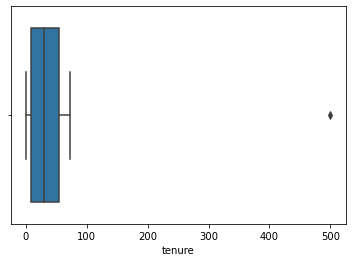

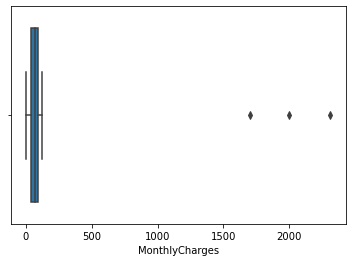

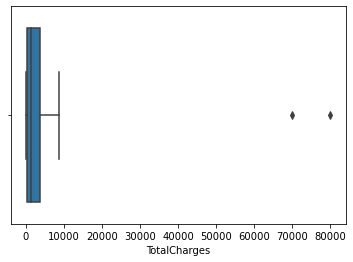

In [17]:
import pandas as pd
df_load = pd.read_csv('dqlab_telco.csv')

df_load['valid_id'] = df_load['customerID'].astype(str).str.match(r'(45\d{9,10})')
df_load = (df_load[df_load['valid_id'] == True]).drop('valid_id', axis = 1)
df_load.drop_duplicates()
df_load = df_load.sort_values('UpdatedAt', ascending=False).drop_duplicates(['customerID'])
df_load.dropna(subset=['Churn'],inplace=True)

df_load['tenure'].fillna(11, inplace=True)
for col_name in list(['MonthlyCharges','TotalCharges']):
    median = df_load[col_name].median()
    df_load[col_name].fillna(median, inplace=True)

print('\nPersebaran data sebelum ditangani Outlier: ')
print(df_load[['tenure','MonthlyCharges','TotalCharges']].describe())

# Creating Box Plot
import matplotlib.pyplot as plt
import seaborn as sns

# Misal untuk kolom tenure
plt.figure()
sns.boxplot(x=df_load['tenure'])
plt.show()
# dan seterusnya untuk kedua kolom yang tersisa secara berurut
plt.figure()
sns.boxplot(x=df_load['MonthlyCharges'])
plt.show()

plt.figure()
sns.boxplot(x=df_load['TotalCharges'])
plt.show()

Cara mengatasi adanya Outlier adalah dengan cara mengubah nilai-nilai outliers menjadi nilai maksimum dan minimum IQR

Nilai Maximum dari masing-masing Variable adalah:
tenure             124.00000
MonthlyCharges     169.93125
TotalCharges      8889.13125
dtype: float64

Nilai Minimum dari masing-masing Variable adalah:
tenure             -60.00000
MonthlyCharges     -43.61875
TotalCharges     -4682.31875
dtype: float64

Persebaran data setelah ditangani Outlier:
            tenure  MonthlyCharges  TotalCharges
count  6950.000000     6950.000000   6950.000000
mean     32.423165       64.992201   2286.058750
std      24.581073       30.032040   2265.702553
min       0.000000        0.000000     19.000000
25%       9.000000       36.462500    406.975000
50%      29.000000       70.450000   1400.850000
75%      55.000000       89.850000   3799.837500
max     124.000000      169.931250   8889.131250


<ipython-input-19-66f5eef22658>:29: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  more_than=(df_load > maximum)
<ipython-input-19-66f5eef22658>:30: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  lower_than=(df_load < minimum)


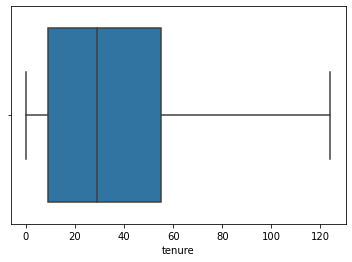

In [19]:
import pandas as pd
df_load = pd.read_csv('dqlab_telco.csv')

df_load['valid_id'] = df_load['customerID'].astype(str).str.match(r'(45\d{9,10})')
df_load = (df_load[df_load['valid_id'] == True]).drop('valid_id', axis = 1)
df_load.drop_duplicates()
df_load = df_load.sort_values('UpdatedAt', ascending=False).drop_duplicates(['customerID'])
df_load.dropna(subset=['Churn'],inplace=True)

df_load['tenure'].fillna(11, inplace=True)
for col_name in list(['MonthlyCharges','TotalCharges']):
    median = df_load[col_name].median()
    df_load[col_name].fillna(median, inplace=True)

# Your code goes here
Q1 = (df_load[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.25)
Q3= (df_load[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5*IQR)
print('Nilai Maximum dari masing-masing Variable adalah:')
print(maximum)

minimum = Q1 - (1.5*IQR)
print('\nNilai Minimum dari masing-masing Variable adalah:')
print(minimum)

more_than=(df_load > maximum)
lower_than=(df_load < minimum)
df_load = df_load.mask(more_than, maximum, axis=1)
df_load = df_load.mask(lower_than, minimum, axis=1)
print('\nPersebaran data setelah ditangani Outlier:')
print(df_load[['tenure','MonthlyCharges','TotalCharges']].describe())

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure()
sns.boxplot(x=df_load['tenure'])
plt.show()

**Conclusion**

Dari ketiga boxplot dengan variable 'tenure','MonthlyCharges' & 'TotalCharges' terlihat jelas bahwasannya ada outlier.Hal ini bisa di identifikasi dari adanya titik-titik yang berada jauh dari gambar boxplot-nya.Kemudian kalau kita liat persebaran datanya dari kolom max nya juga ada nilai yang sangat tinggi sekali.Kemudian nilai outlier tersebut ditangani dengan cara merubah nilainya ke nilai maximum & minimum dari interquartile range (IQR). Setelah di tangani outlier-nya, dan dilihat perseberan datanya, terlihat sudah tidak ada lagi nilai yang outlier.

# 4. Mendeteksi Nilai yang tidak Standar
Mendeteksi apakah ada nilai-nilai dari variable kategorik yang tidak standard. Hal ini biasanya terjadi dikarenakan kesalahan input data. Perbedaan istilah menjadi salah satu faktor yang sering terjadi, untuk itu dibutuhkan standardisasi dari data yang sudah ter-input.

In [21]:
#4. Standarisasi Nilai
#4a. Cek Nilai yang tidak standard
import pandas as pd
df_load = pd.read_csv('dqlab_telco.csv')

df_load['valid_id'] = df_load['customerID'].astype(str).str.match(r'(45\d{9,10})')
df_load = (df_load[df_load['valid_id'] == True]).drop('valid_id', axis = 1)
df_load.drop_duplicates()
df_load = df_load.sort_values('UpdatedAt', ascending=False).drop_duplicates(['customerID'])
df_load.dropna(subset=['Churn'],inplace=True)

df_load['tenure'].fillna(11, inplace=True)
for col_name in list(['MonthlyCharges','TotalCharges']):
    median = df_load[col_name].median()
    df_load[col_name].fillna(median, inplace=True)

Q1 = (df_load[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.25)
Q3 = (df_load[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.75)
IQR = Q3 - Q1
maximum  = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)

more_than     = (df_load > maximum)
lower_than    = (df_load < minimum)
df_load       = df_load.mask(more_than, maximum, axis=1) 
df_load       = df_load.mask(lower_than, minimum, axis=1)

#Loop
for col_name in list(['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']):
						 print('\nUnique Values Count \033[1m' + 'Before Standardized \033[0mVariable',col_name)
						 print(df_load[col_name].value_counts())
 

<ipython-input-21-21402a8e97ee>:22: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  more_than     = (df_load > maximum)
<ipython-input-21-21402a8e97ee>:23: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  lower_than    = (df_load < minimum)



Unique Values Count Before Standardized Variable gender
Male         3499
Female       3431
Wanita         14
Laki-Laki       6
Name: gender, dtype: int64

Unique Values Count Before Standardized Variable SeniorCitizen
0    5822
1    1128
Name: SeniorCitizen, dtype: int64

Unique Values Count Before Standardized Variable Partner
No     3591
Yes    3359
Name: Partner, dtype: int64

Unique Values Count Before Standardized Variable Dependents
No     4870
Yes    2060
Iya      20
Name: Dependents, dtype: int64

Unique Values Count Before Standardized Variable PhoneService
Yes    6281
No      669
Name: PhoneService, dtype: int64

Unique Values Count Before Standardized Variable MultipleLines
No                  3346
Yes                 2935
No phone service     669
Name: MultipleLines, dtype: int64

Unique Values Count Before Standardized Variable InternetService
Fiber optic    3057
DSL            2388
No             1505
Name: InternetService, dtype: int64

Unique Values Count Before Stand

Menstandarisasi data category

In [22]:
import pandas as pd
df_load = pd.read_csv('dqlab_telco.csv')

df_load['valid_id'] = df_load['customerID'].astype(str).str.match(r'(45\d{9,10})')
df_load = (df_load[df_load['valid_id'] == True]).drop('valid_id', axis = 1)
df_load.drop_duplicates()
df_load = df_load.sort_values('UpdatedAt', ascending=False).drop_duplicates(['customerID'])
df_load.dropna(subset=['Churn'],inplace=True)

df_load['tenure'].fillna(11, inplace=True)
for col_name in list(['MonthlyCharges','TotalCharges']):
    median = df_load[col_name].median()
    df_load[col_name].fillna(median, inplace=True)

Q1 = (df_load[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.25)
Q3 = (df_load[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.75)
IQR = Q3 - Q1
maximum  = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)

more_than     = (df_load > maximum)
lower_than    = (df_load < minimum)
df_load       = df_load.mask(more_than, maximum, axis=1) 
df_load       = df_load.mask(lower_than, minimum, axis=1)

df_load = df_load.replace(['Wanita','Laki-Laki','Churn','Iya'],['Female','Male','Yes','Yes'])

#Loop
for col_name in list(['gender','Dependents','Churn']):
	print('\nUnique Values Count \033[1m' + 'After Standardized\033[0mVariable', col_name)
	print(df_load[col_name].value_counts())


Unique Values Count After StandardizedVariable gender
Male      3505
Female    3445
Name: gender, dtype: int64

Unique Values Count After StandardizedVariable Dependents
No     4870
Yes    2080
Name: Dependents, dtype: int64

Unique Values Count After StandardizedVariable Churn
No     5114
Yes    1836
Name: Churn, dtype: int64


<ipython-input-22-114c3731555b>:22: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  more_than     = (df_load > maximum)
<ipython-input-22-114c3731555b>:23: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  lower_than    = (df_load < minimum)


**Conclusion**

Ketika kita amati lebih jauh dari jumlah unique value dari masing-masing variable kategorik, terlihat jelas bahwa ada beberapa variable yang tidak standar. Variable itu adalah:
Gender (Female, Male, Wanita, Laki-Laki), yang bisa di standardkan nilainya menjadi (Female, Male) karena mempunyai makna yang sama.
Dependents (Yes, No, Iya), yang bisa di standardkan nilainya menjadi (Yes, No) karena mempunyai makna yang sama.
Churn (Yes, No, Churn), yang bisa di standardkan nilainya menjadi (Yes, No) karena mempunyai makna yang sama.
Setelah kita standardkan nilainya, dan kita amati kembali bentuk datanya, sudah terstandar dengan baik untuk unique value-nya.